C:\Users\User\AppData\Local\Temp\ipykernel_8852\3071249494.py:33: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,


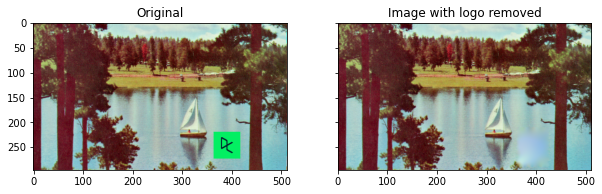

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from skimage import io
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color
image_with_logo = plt.imread('logo.png')

#plot_comparison(logo removal)
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    #ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    #ax2.axis('off')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:290, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')


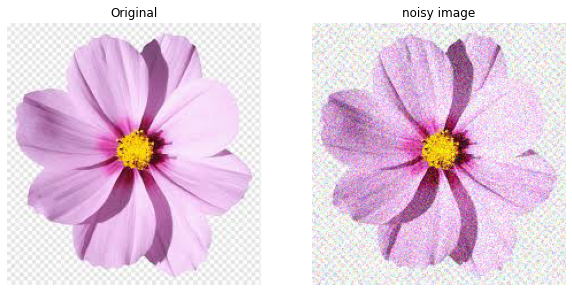

In [2]:
#Adding noise
import matplotlib.pyplot as plt
from skimage.util import random_noise

def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

bfly_img=plt.imread("flower2.jpg")

#Add noise to the image
noisy_img=random_noise(bfly_img)

#show the original and resulting image
plot_comparison(bfly_img,noisy_img,"noisy image")



C:\Users\User\AppData\Local\Temp\ipykernel_8852\65197869.py:6: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)


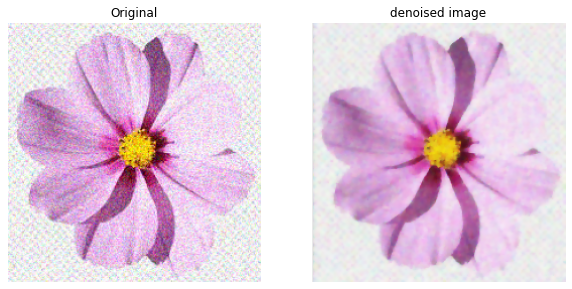

In [3]:
from skimage.restoration import denoise_tv_chambolle

noisy_image=plt.imread('noisy2.png')

#Apply total variation filter denoising
denoised_image=denoise_tv_chambolle(noisy_image,multichannel=True)

#Show the noisy and denoised image
plot_comparison(noisy_image,denoised_image,"denoised image")

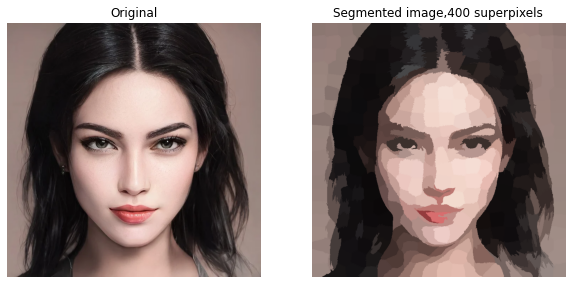

In [4]:
#Segmntation
from skimage.segmentation import slic
from skimage.color import label2rgb

img=plt.imread('girl.jpg')

#obtain the segmentation with 400 regions
segments=slic(img,n_segments=400)

#put segments on top of original image to compare
segmented_image=label2rgb(segments,img,kind='avg')

#Show the segmented image
plot_comparison(img,segmented_image,'Segmented image,400 superpixels')



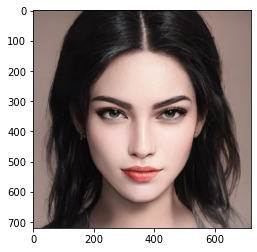

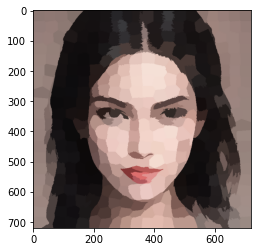

In [5]:
#Those who are not getting output for the segmentation Refer this code:
#Segmntation
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt
img=plt.imread('girl.jpg')

#obtain the segmentation with 400 regions
segments=slic(img,n_segments=400, compactness=20)

#put segments on top of original image to compare
segmented_image=label2rgb(segments,img,kind='avg')

#Show the segmented image
plt.imshow(img.astype('uint8'))
plt.show()
plt.imshow(segmented_image.astype('uint8'))
plt.show()